First we establish a function f(x) which we will name fun to be called in our other functions.

In [15]:
def fun(x):
    from sympy import symbols
    x1,x2,x3=symbols('x_1,x_2,x_3')
    y=(x[0]+x[1])**2+(x[1]+x[2])**2;
    return y

Next, we will establish a function func_a which will define the search function along its path.

In [2]:
def func_a(fun,dk,xk,ai):
    from numpy import asarray
    xi = xk + ai*asarray(dk)
    fi= fun(xi)
    return fi

Now, we will establish a function to search for the upper and lower bounds of our search. If this domain contains the function minimum then the while loop will break.

In [3]:
def bound_search(fun,xk,dk,LB,UB,delta):
    from numpy import arange
    from numpy import asarray
    as1= arange(LB,UB,delta)
    q=1
    aq=as1[q]
    xq=xk+asarray(dk)*aq
    yq1=func_a(fun,dk,xk,aq)
    while 1:
        q=q+1;
        aq=as1[q]
        yq2 = func_a(fun,dk,xk,aq)
        if yq1<yq2:
            new_LB=as1[q-2]
            new_UB=as1[q]
            break
        yq1=yq2
    return (new_LB,new_UB)

Now, we will establish a function to impliment the line search method. The bounds are searched iteratively until they are within a tolerance epsilon value

In [26]:
from matplotlib import *
def line_search_equal_interval(fun, xk, dk,LB,UB):

    from numpy import arange
    from numpy import append
    from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,ylim,xlim,xticks,yticks
    %matplotlib inline
    
    fig, ax = subplots()
    xmin=LB
    xmax=UB
    delta = .01
    r = .2
    epsilon_tolerance = .00001
    aopt_found = 0
    iter = 1
    as1 = arange(LB, UB, delta / 10)
    sn = len(as1)
    sn = arange(0, sn, 1)
    ys = []
    
    for i in sn:
        yi = func_a(fun, dk, xk, as1[i])
        ys = append(ys, yi)

    #####plot search line and plot formatting
    CS = ax.plot(as1, ys)
    xlabel('x',fontsize=24,y=1.02)
    ylabel('f(x)',fontsize=24)
    title('Equal Interval Search Method Optimization Technique',fontsize=24,y=1.02)
    tick_params(labelsize=24,pad=6)
    grid()
    #####
    
    while not (aopt_found == 1):
        (new_LB, new_UB) = bound_search(fun, xk, dk, LB, UB, delta)
        if abs(new_UB - new_LB) < epsilon_tolerance:
            aopt_found = 1;
        delta = r * delta
        LB = new_LB
        UB = new_UB
        plot(LB, 0)
        plot(UB, 0)
        iter = iter + 1
        a_opt = (UB + LB) / 2
        print(a_opt)
        ax.plot(UB, min(ys), 'b|',LB,min(ys),'b|',markersize=20)
    ax.plot(a_opt, min(ys), 'ro',label='optimal design point')
    
    #####Plot formatting
    legend(loc=0,fontsize=24)
    fig.set_size_inches(18.5, 10.5)  
    xmax=max(as1)
    xtickstepsize=(xmax)/10
    xticks(arange(xmin,xmax,step=xtickstepsize),rotation=30)
    ymin=min(ys)
    ymax=max(ys)
    ytickstepsize=ymax/10
    yticks(arange(ymin,ymax,ytickstepsize))   
    xlim(xmin,xmax)
    ylim(ymin-ytickstepsize,ymax)
    show()
    #####
    
    iter = iter

    return a_opt

Finally, we excecute the function we have created.

0.16999999999999998
0.166
0.1668000000000001
0.16664000000000007
0.166672
0.16666560000000002


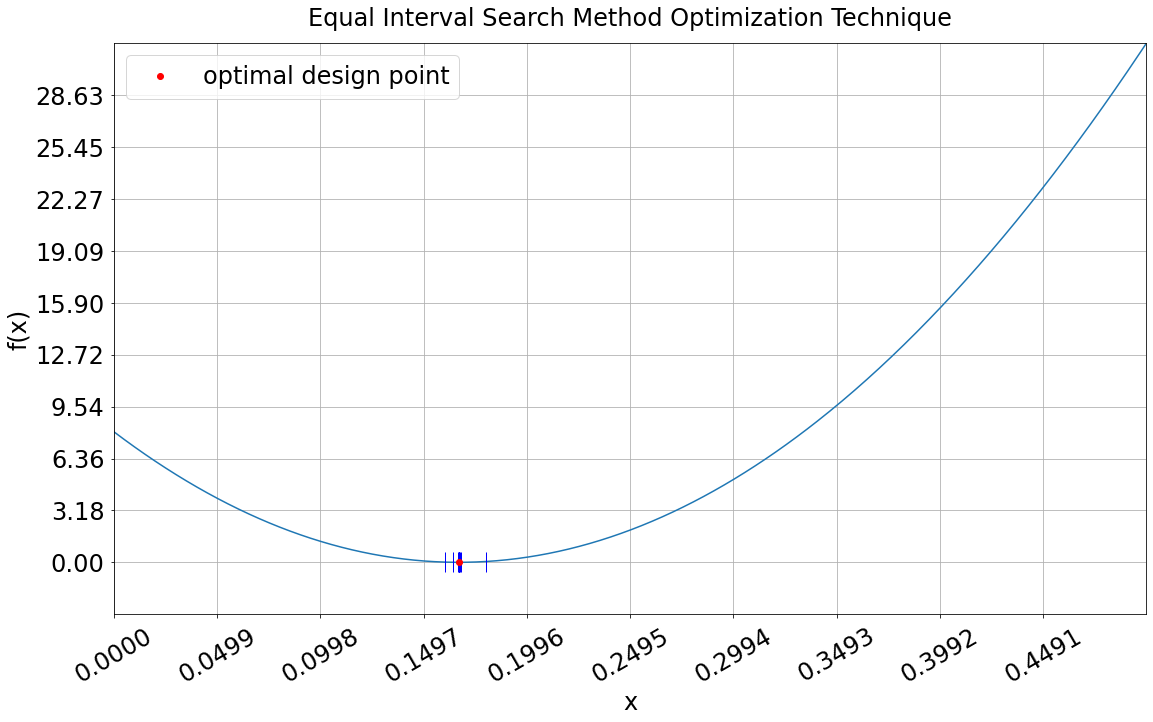

0.16666560000000002

In [27]:
xk=[1,1,1]
dk=[-4,-8,-4]
LB = 0
UB = .5
line_search_equal_interval(fun,xk,dk,LB,UB)